In [1]:
from paddleocr import PaddleOCR

c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


In [4]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to C:\Users\hp/.paddleocr/whl\rec\en\en_PP-OCRv4_rec_infer\en_PP-OCRv4_rec_infer.tar













































































































































































































































































































































































































































































































100%|██████████| 10.2M/10.2M [04:17<00:00, 39.8kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\hp/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar






















































































100%|██████████| 2.19M/2.19M [00:26<00:00, 81.3kiB/s]

[2025/11/05 13:22:59] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\hp/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\hp/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_p

In [68]:
import cv2
from matplotlib import pyplot as plt

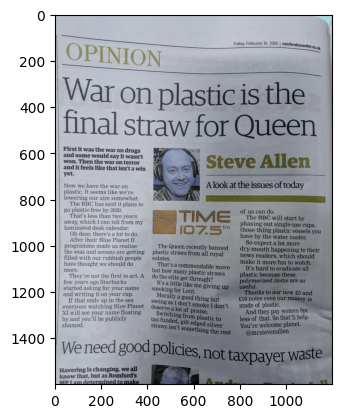

In [69]:
IMG_PATH = 'image\image.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

plt.imshow(img)

In [70]:
result = ocr.ocr(IMG_PATH, cls=True)
for line in result:
    print(line)

[2025/11/10 10:27:13] ppocr DEBUG: dt_boxes num : 73, elapsed : 0.9100258350372314
[2025/11/10 10:27:13] ppocr DEBUG: cls num  : 73, elapsed : 0.599876880645752
[2025/11/10 10:27:26] ppocr DEBUG: rec_res num  : 73, elapsed : 12.153123140335083
[[[[53.0, 125.0], [459.0, 158.0], [453.0, 228.0], [47.0, 195.0]], ('OPINION', 0.9981356859207153)], [[[26.0, 262.0], [1089.0, 288.0], [1085.0, 424.0], [23.0, 399.0]], ('War on plastic is the', 0.9508261680603027)], [[[40.0, 414.0], [1131.0, 444.0], [1128.0, 546.0], [37.0, 516.0]], ('final straw for Queen', 0.9515016674995422)], [[[31.0, 566.0], [372.0, 577.0], [371.0, 605.0], [30.0, 595.0]], ('First it was the war on drugs', 0.971584677696228)], [[[33.0, 595.0], [380.0, 604.0], [380.0, 630.0], [32.0, 621.0]], ("and some would say it wasn't", 0.9676406979560852)], [[[649.0, 604.0], [1097.0, 598.0], [1098.0, 666.0], [650.0, 672.0]], ('Steve Allen', 0.9795039892196655)], [[[34.0, 623.0], [367.0, 630.0], [366.0, 654.0], [34.0, 647.0]], ('won.Then the

In [71]:
for line in result:
    print(type(line[1][1]), line[1][1])


<class 'tuple'> ('War on plastic is the', 0.9508261680603027)


In [72]:
for item in result:
    print(item[1])


[[[26.0, 262.0], [1089.0, 288.0], [1085.0, 424.0], [23.0, 399.0]], ('War on plastic is the', 0.9508261680603027)]


In [73]:
from paddleocr import draw_ocr

In [74]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(IMG_PATH).convert('RGB')


boxes = []
texts = []
scores = []

for line in result[0]:
    box = line[0]
    text = line[1][0]
    score = line[1][1]

    boxes.append(box)
    texts.append(text)
    scores.append(score)


font = ImageFont.load_default()

im_show = draw_ocr(
    image, 
    boxes, 
    texts, 
    scores,
    drop_score=0.0, 
    font_path="C:/Windows/Fonts/BERNHC.TTF")

im_show = Image.fromarray(im_show)

im_show.save('result.jpg')

print("Saved result.jpg")


Saved result.jpg


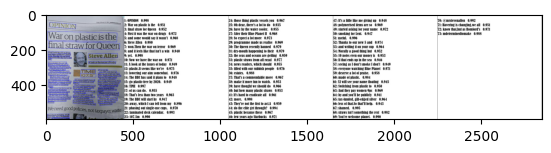

In [75]:
img = cv2.imread('result.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

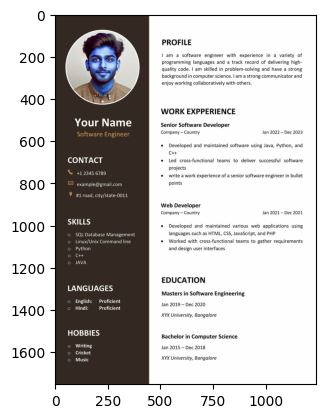

In [76]:
IMG_PATH = 'image\CV.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

plt.imshow(img)

In [77]:
result = ocr.ocr(IMG_PATH, cls=True)
for line in result:
    print(line)

[2025/11/10 10:27:36] ppocr DEBUG: dt_boxes num : 57, elapsed : 0.30669260025024414
[2025/11/10 10:27:36] ppocr DEBUG: cls num  : 57, elapsed : 0.31529831886291504
[2025/11/10 10:27:48] ppocr DEBUG: rec_res num  : 57, elapsed : 11.643805742263794
[[[[506.0, 119.0], [648.0, 119.0], [648.0, 150.0], [506.0, 150.0]], ('PROFILE', 0.9975787401199341)], [[[500.0, 181.0], [1170.0, 185.0], [1170.0, 210.0], [500.0, 206.0]], ('I am a software engineer with experience in a variety of', 0.9398533701896667)], [[[504.0, 217.0], [1166.0, 216.0], [1166.0, 241.0], [504.0, 243.0]], ('programming languages and a track record of delivering high-', 0.9620271325111389)], [[[504.0, 248.0], [1170.0, 250.0], [1170.0, 276.0], [504.0, 274.0]], ('quality code. I am skilled in problem-solving and have a strong', 0.9508675932884216)], [[[502.0, 281.0], [1170.0, 283.0], [1170.0, 309.0], [502.0, 307.0]], ('background in computer science.I am a strong communicator and', 0.9707834720611572)], [[[502.0, 316.0], [932.0, 3

In [78]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(IMG_PATH).convert('RGB')


boxes = []
texts = []
scores = []

for line in result[0]:
    box = line[0]
    text = line[1][0]
    score = line[1][1]

    boxes.append(box)
    texts.append(text)
    scores.append(score)


font = ImageFont.load_default()

im_show = draw_ocr(
    image, 
    boxes, 
    texts, 
    scores,
    drop_score=0.0, 
    font_path="C:/Windows/Fonts/BERNHC.TTF")

im_show = Image.fromarray(im_show)

im_show.save('result2.jpg')

print("Saved result.jpg")


Saved result.jpg


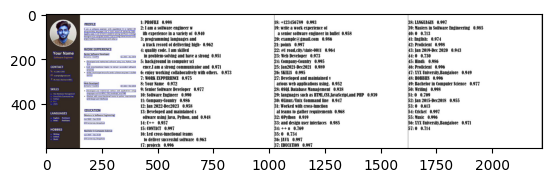

In [79]:
img = cv2.imread('result2.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

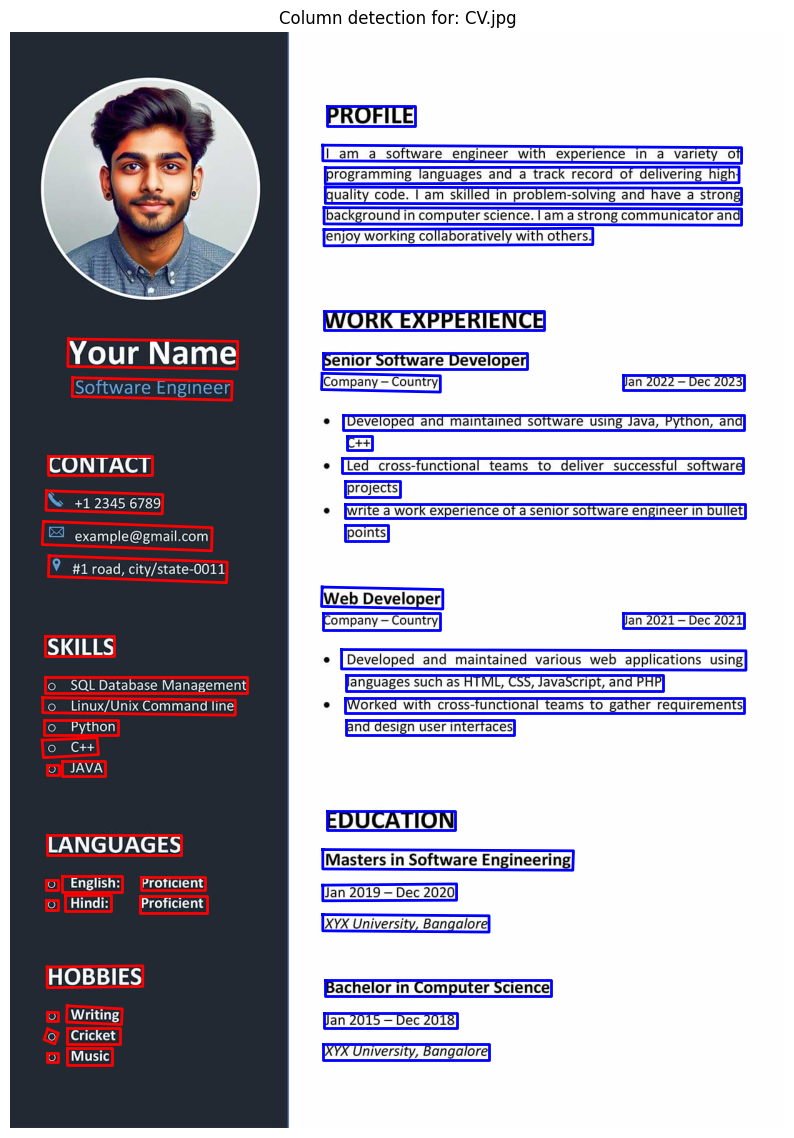

In [80]:
import os
from sklearn.cluster import KMeans
import matplotlib.image as mpimg


if not result or result[0] is None:
    print(f"No text detected in image: {IMG_PATH}")
else:
    lines = result[0]

    # --- Step 1: Extract x positions for clustering ---
    x_centers = []
    for line in lines:
        if len(line) < 2:
            continue
        box = line[0]
        x_min = min([p[0] for p in box])
        x_max = max([p[0] for p in box])
        x_center = (x_min + x_max) / 2
        x_centers.append([x_center])

    # --- Step 2: Cluster x positions to detect columns ---
    if len(x_centers) >= 2:
        kmeans = KMeans(n_clusters=2, random_state=0).fit(x_centers)
        column_labels = kmeans.labels_
    else:
        column_labels = [0] * len(lines)

    # --- Step 3: Plot image with colored bounding boxes ---
    img = mpimg.imread(IMG_PATH)
    plt.figure(figsize=(10, 15))
    plt.imshow(img)
    ax = plt.gca()

    colors = ['red', 'blue']

    for i, line in enumerate(lines):
        if len(line) < 2:
            continue
        box = line[0]
        x = [p[0] for p in box]
        y = [p[1] for p in box]
        ax.plot(x + [x[0]], y + [y[0]], color=colors[column_labels[i] % len(colors)], linewidth=2)

    plt.title(f"Column detection for: {os.path.basename(IMG_PATH)}")
    plt.axis('off')
    plt.show()

In [81]:
columns = {0: [], 1: []}

for i, line in enumerate(lines):
    if len(line) < 2:
        continue
    text = line[1][0]
    col = column_labels[i]
    columns[col].append((line[0][0][1], text))  # store y-pos + text for sorting

    # --- Step 5: Sort each column top-to-bottom ---
for col in columns:
    columns[col] = sorted(columns[col], key=lambda x: x[0])  # sort by y

    # --- Step 6: Print content column by column ---
print("\n==================== EXTRACTED TEXT ====================\n")
for col_id, color in enumerate(colors):
    if columns[col_id]:
        print(f"🟦 Column {col_id + 1} ({color.upper()}):")
        for _, text in columns[col_id]:
            print("   " + text)
        print()


==================== EXTRACTED TEXT ====================

🟦 Column 1 (RED):
   Your Name
   Software Engineer
   CONTACT
   +123456789
   example@gmail.com
   #1 road,city/state-0011
   SKILLS
   OSQL Database Management
   OLinux/Unix Command line
   OPython
   ++ o
   JAVA
   O
   LANGUAGES
   English:
   Proficient
   O
   Hindi:
   Proficient
   O
   HOBBIES
   Writing
   O
   Cricket
   O
   Music
   O

🟦 Column 2 (BLUE):
   PROFILE
   I am a software engineer with experience in a variety of
   programming languages and a track record of delivering high-
   quality code. I am skilled in problem-solving and have a strong
   background in computer science.I am a strong communicator and
   enjoy working collaboratively with others.
   WORK EXPPERIENCE
   Senior Software Developer
   Company-Country
   Jan 2022-Dec2023
   Developed and maintained software using Java, Python, and
   C++
   Led cross-functional teams to deliver successful software
   projects
   write a work experience